<a href="https://colab.research.google.com/github/zuzka05/stat_learn/blob/main/QuantTradingAccelerator_Part5_StatisticalEdge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quant Trading Accelerator 🚀

Learn from 0, extremely fast => JIT Learning => Build, Test, Learn, Iterate 🚀

Feedback is important!

## Part 5: Statistical Edge

Goals:

1. Learn key Matrix Algebra operations
2. How to create and measure a statistical edge using machine learning
3. How to make money with a tiny statistical edge (Win Rate != Alpha)
4. Build our first alpha model

**array** => **vector** => **time series** => **matrices** => **multi-variate time series** => **forecasting**

*   model => statistical edge
*   strategy => execution of the statistical edge

In [1]:
#win rate is not alpha!
#models are stat edge
#then how to execute the stat edge

In [2]:
# numerical computing library for fast calculation
import numpy as np
# data analysis library
import pandas as pd
# data visualization library
import seaborn as sns

# machine learning library
import torch
import torch.nn as nn
import torch.optim as optim

### Matrix Algebra

What is a Matrix?

In [3]:
#It's a 2-dimensional array

In [4]:
matrix = [[1,2,3],[4,5,6],[7,8,9]]

In [5]:
matrix[0]

[1, 2, 3]

In [6]:
matrix[0][0]

1

In [7]:
matrix[0][1]

2

In [8]:
matrix[0][2]

3

In [9]:
matrix[1][0]

4

### Matrix-Scalar Algebra

In [10]:
# matrix + 1

no_rows = len(matrix)
no_cols = len(matrix[0])

m = no_rows
n = no_cols

for i in range(m):
  for j in range(n):
    matrix[i][j] += 1

matrix

[[2, 3, 4], [5, 6, 7], [8, 9, 10]]

In [11]:
[
    [1 + 1, 2 + 1, 3 + 1],
    [4 + 1, 5 + 1, 6 + 1],
    [7 + 1, 8 + 1, 9 + 1],
]

[[2, 3, 4], [5, 6, 7], [8, 9, 10]]

In [12]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [13]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [14]:
A + 1

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [15]:
1 + A

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [16]:
A * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

### Matrix-Vector Algebra

X * w = y_hat

In [17]:
#Multipy matrix (X) by a vector
#If a matrix is univariate, we still want to model it as a matrix
#Matrix of log returns

In [18]:
X = np.array([[-0.1,-0.2], [-0.2, -0.4], [-0.4, -0.8]])

In [19]:
X

array([[-0.1, -0.2],
       [-0.2, -0.4],
       [-0.4, -0.8]])

In [20]:
#We used ML to work out most optimal weights§

In [21]:
w = np.array([-0.5, -0.1])

In [22]:
w

array([-0.5, -0.1])

In [ ]:
#Multiplying each return with weight and summing them up together

In [23]:
np.dot(X, w)

array([0.07, 0.14, 0.28])

In [ ]:
#lag1 value multiplied by weight etc

In [24]:
w1 = w[0]
w2 = w[1]

np.array([-0.1 * w1 + -0.2 * w2,-0.2 * w1 + -0.4 * w2,-0.4 * w1 + -0.8 * w2])

array([0.07, 0.14, 0.28])

In [25]:
bias = 0.0001
b = bias

In [ ]:
#What is the optimal weight?
#Our model is the dot product between X and weight
#+ The bias (adds a tiny epsilon)
#It can be a small negative number, slightly skew it to be positive

In [26]:
np.dot(X, w) + b

array([0.0701, 0.1401, 0.2801])

Broadcasting != Matrix Multiplication

In [ ]:
#Make sure you're doing matrix multiplication not broadcasting

In [27]:
X * w

array([[0.05, 0.02],
       [0.1 , 0.04],
       [0.2 , 0.08]])

In [28]:
np.dot(X, w)

array([0.07, 0.14, 0.28])

 How to develop a Statistical Edge (using Machine Learning)

### Statistical Edge == Good Forecast

In [ ]:
#Where the EV is positive
#Bitcoin perp contract -> future that doesn't roll

### Download OHLC perp data

In [ ]:
#HFT data and feed data

In [29]:
url = 'https://drive.google.com/uc?export=download&id=1qnX9GpiL5Ii1FEnHTIAzWnxNejWnilKp'
btcusdt = pd.read_csv(url, parse_dates=["open_time"], index_col='open_time')

btcusdt

,open,high,low,close,volume
open_time,,,,,
2020-11-27 00:00:00,17155.37,17418.93,17024.20,17400.00,15427.474
2020-11-27 01:00:00,17401.51,17465.00,17271.30,17309.94,16632.689
2020-11-27 02:00:00,17309.93,17328.09,17072.80,17102.38,16168.837
2020-11-27 03:00:00,17102.10,17277.86,17029.32,17084.05,13670.593
2020-11-27 04:00:00,17084.05,17194.00,17061.00,17079.56,10866.299
...,...,...,...,...,...
2025-11-10 19:00:00,105435.90,106000.00,105354.00,105767.20,2971.178
2025-11-10 20:00:00,105767.10,106249.60,105750.30,105956.70,3483.547
2025-11-10 21:00:00,105956.70,105973.90,105202.70,105583.50,3305.325


In [ ]:
#Log return -> time-additivity, cumulative returns

In [30]:
btcusdt['close_log_return'] = np.log(btcusdt['close']/btcusdt['close'].shift())
btcusdt

,open,high,low,close,volume,close_log_return
open_time,,,,,,
2020-11-27 00:00:00,17155.37,17418.93,17024.20,17400.00,15427.474,NaN
2020-11-27 01:00:00,17401.51,17465.00,17271.30,17309.94,16632.689,-0.005189
2020-11-27 02:00:00,17309.93,17328.09,17072.80,17102.38,16168.837,-0.012063
2020-11-27 03:00:00,17102.10,17277.86,17029.32,17084.05,13670.593,-0.001072
2020-11-27 04:00:00,17084.05,17194.00,17061.00,17079.56,10866.299,-0.000263
...,...,...,...,...,...,...
2025-11-10 19:00:00,105435.90,106000.00,105354.00,105767.20,2971.178,0.003138
2025-11-10 20:00:00,105767.10,106249.60,105750.30,105956.70,3483.547,0.001790
2025-11-10 21:00:00,105956.70,105973.90,105202.70,105583.50,3305.325,-0.003528


In [ ]:
#AR model
#Use this lag to predict the next lag return
#If we buy at this time and close just before the next time - what's our return

In [31]:
btcusdt['close_log_return_lag_1'] = btcusdt['close_log_return'].shift()
btcusdt['close_log_return_lag_2'] = btcusdt['close_log_return'].shift(2)
btcusdt['close_log_return_lag_3'] = btcusdt['close_log_return'].shift(3)
btcusdt = btcusdt.dropna()
btcusdt[['close_log_return','close_log_return_lag_1','close_log_return_lag_2','close_log_return_lag_3']]

,close_log_return,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3
open_time,,,,
2020-11-27 04:00:00,-0.000263,-0.001072,-0.012063,-0.005189
2020-11-27 05:00:00,0.010946,-0.000263,-0.001072,-0.012063
2020-11-27 06:00:00,0.001109,0.010946,-0.000263,-0.001072
2020-11-27 07:00:00,-0.010552,0.001109,0.010946,-0.000263
2020-11-27 08:00:00,-0.014575,-0.010552,0.001109,0.010946
...,...,...,...,...
2025-11-10 19:00:00,0.003138,-0.004455,0.006797,0.001525
2025-11-10 20:00:00,0.001790,0.003138,-0.004455,0.006797
2025-11-10 21:00:00,-0.003528,0.001790,0.003138,-0.004455


In [ ]:
#The strongest correlation is lag_2

In [32]:
btcusdt[['close_log_return','close_log_return_lag_1','close_log_return_lag_2','close_log_return_lag_3']].corr()

,close_log_return,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3
close_log_return,1.000000,-0.005855,-0.012630,-0.001328
close_log_return_lag_1,-0.005855,1.000000,-0.005846,-0.012627
close_log_return_lag_2,-0.012630,-0.005846,1.000000,-0.005803
close_log_return_lag_3,-0.001328,-0.012627,-0.005803,1.000000


### Inspect the data

In [ ]:
#There's no quadratic relationship

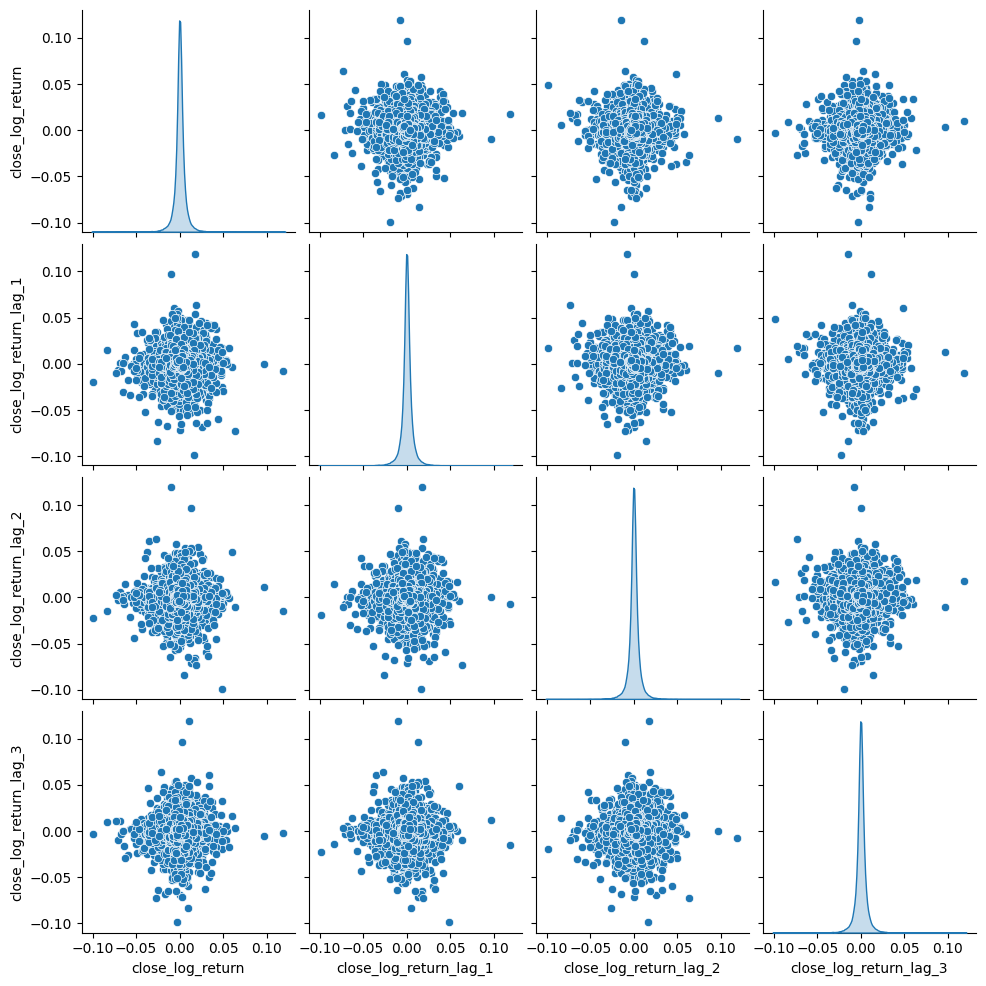

In [82]:
sns.pairplot(btcusdt[['close_log_return', 'close_log_return_lag_1', 'close_log_return_lag_2', 'close_log_return_lag_3']], diag_kind='kde')

In [ ]:
#Turn values into a matrix
#Shape tells us the dimensions of the matrix
#n-dimensional matrices are tensores

In [34]:
X = btcusdt[['close_log_return_lag_1','close_log_return_lag_2','close_log_return_lag_3']].dropna().values

In [35]:
X

array([[-0.00107236, -0.01206327, -0.0051893 ],
       [-0.00026285, -0.00107236, -0.01206327],
       [ 0.01094601, -0.00026285, -0.00107236],
       ...,
       [ 0.00179007,  0.00313822, -0.00445534],
       [-0.00352841,  0.00179007,  0.00313822],
       [ 0.00397283, -0.00352841,  0.00179007]])

In [36]:
X.shape

(43436, 3)

In [ ]:
#we want to predict this
#model this as a vector

In [37]:
y = btcusdt['close_log_return'].dropna().values

In [38]:
y

array([-0.00026285,  0.01094601,  0.00110898, ..., -0.00352841,
        0.00397283, -0.00035382])

In [39]:
y.shape

(43436,)

 Forecasting: Regression

### Split Training/Testing Data

In [40]:
# time:  t0 ---- t1 ---- t2 ---- t3 ---- t4 ---- t5 ---- t6 ---- t7
# train: [===============================]
# test:                                  [=========================]

In [ ]:
#Preserve the natural pattern of TS
#75-25
#Is there persistence of this pattern to future values ?
#In scikit by nature the data is shuffled
#Below pass the df, it returns a tuple

In [41]:
def time_split(x, train_size = 0.75):
  i = int(len(x) * train_size)
  return x[:i].copy(), x[i:].copy()

btcusdt_train, btcusdt_test = time_split(btcusdt, train_size = 0.7)

In [42]:
btcusdt_train

,open,high,low,close,volume,close_log_return,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3
open_time,,,,,,,,,
2020-11-27 04:00:00,17084.05,17194.00,17061.00,17079.56,10866.299,-0.000263,-0.001072,-0.012063,-0.005189
2020-11-27 05:00:00,17079.55,17350.00,17078.78,17267.54,13783.564,0.010946,-0.000263,-0.001072,-0.012063
2020-11-27 06:00:00,17267.54,17316.32,17177.00,17286.70,9598.037,0.001109,0.010946,-0.000263,-0.001072
2020-11-27 07:00:00,17286.70,17297.90,17040.00,17105.25,13115.712,-0.010552,0.001109,0.010946,-0.000263
2020-11-27 08:00:00,17106.79,17116.04,16714.92,16857.75,31574.365,-0.014575,-0.010552,0.001109,0.010946
...,...,...,...,...,...,...,...,...,...
2024-05-16 20:00:00,65152.30,65270.10,65018.70,65248.00,3804.218,0.001469,0.000934,0.001765,-0.002423
2024-05-16 21:00:00,65247.90,65480.00,65204.20,65429.10,4205.893,0.002772,0.001469,0.000934,0.001765
2024-05-16 22:00:00,65429.00,65457.00,65100.00,65389.20,4533.237,-0.000610,0.002772,0.001469,0.000934


In [43]:
btcusdt_test

,open,high,low,close,volume,close_log_return,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3
open_time,,,,,,,,,
2024-05-17 01:00:00,65477.9,65478.0,65061.2,65311.0,6160.987,-0.002554,0.003983,-0.002626,-0.000610
2024-05-17 02:00:00,65311.1,65430.0,65146.5,65351.5,4190.566,0.000620,-0.002554,0.003983,-0.002626
2024-05-17 03:00:00,65351.4,65850.0,65300.3,65545.2,11900.518,0.002960,0.000620,-0.002554,0.003983
2024-05-17 04:00:00,65545.1,65600.0,65327.7,65422.7,5906.313,-0.001871,0.002960,0.000620,-0.002554
2024-05-17 05:00:00,65422.8,65675.0,65400.0,65674.9,4946.005,0.003848,-0.001871,0.002960,0.000620
...,...,...,...,...,...,...,...,...,...
2025-11-10 19:00:00,105435.9,106000.0,105354.0,105767.2,2971.178,0.003138,-0.004455,0.006797,0.001525
2025-11-10 20:00:00,105767.1,106249.6,105750.3,105956.7,3483.547,0.001790,0.003138,-0.004455,0.006797
2025-11-10 21:00:00,105956.7,105973.9,105202.7,105583.5,3305.325,-0.003528,0.001790,0.003138,-0.004455


### Train Model

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
import os

#cuda - deterministic flag we can set

# -------------------------------------------------------
# 0. REPRODUCIBILITY SETTINGS
# -------------------------------------------------------
SEED = 99

# Ensure Python’s hash-based operations are deterministic
os.environ["PYTHONHASHSEED"] = str(SEED)

# Set seeds for Python's built-in RNG, NumPy, and PyTorch
random.seed(SEED)
np.random.seed(SEED)

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)          # For single-GPU setups
torch.cuda.manual_seed_all(SEED)      # For multi-GPU setups


# -------------------------------------------------------
# 1. CREATE TENSORS FROM DATAFRAME **AFTER SETTING SEEDS**
# -------------------------------------------------------
#model the relationship as a linear one

# Input features (model predictors)
features = ['close_log_return_lag_3']

# Target variable (model output)
target = 'close_log_return'

# Convert train/test splits into PyTorch tensors
X_train = torch.tensor(btcusdt_train[features].values, dtype=torch.float32)
X_test  = torch.tensor(btcusdt_test[features].values, dtype=torch.float32)

#We need to add column dimension - make sure dimensions are correct size
#Before squeezing and after print those out
# Create target tensors and add a column dimension (N → N×1)
y_train = torch.tensor(btcusdt_train[target].values, dtype=torch.float32).unsqueeze(1)
y_test  = torch.tensor(btcusdt_test[target].values, dtype=torch.float32).unsqueeze(1)


# -------------------------------------------------------
# 2. DEFINE MODEL
# -------------------------------------------------------

#Market making - more sophisticated models
#pytorch - the way we calculate the weight, there's a lot of alpha

# Number of input features (1 in this case)
no_features = len(features)

# Simple linear regression model: y = Wx + b
model = nn.Linear(no_features, 1)

# Huber loss (robust to outliers compared to MSE)
#Between our prediction and the actual value
criterion = nn.HuberLoss()

# Stochastic Gradient Descent optimizer
#Check the maths
#lr is a hyper-parameter
#Fine-tuning lr is interested to optimize
optimizer = optim.SGD(model.parameters(), lr=0.01)

#full-batch gradient descent - all the data loaded in memory
#gradients are additive, they are accumulated
#always reset the gradient, zero out gradient
#gradient is the process of learning
# -------------------------------------------------------
# 3. TRAINING LOOP (FULL-BATCH GRADIENT DESCENT)
# -------------------------------------------------------
for epoch in range(5000):

    # Clear previously stored gradients (they accumulate by default)
    optimizer.zero_grad()

    # Forward pass: compute predictions
    #make the prediction for every data point
    #this vector represents corresponding prediction for each data point in a row
    y_pred = model(X_train)

    # Compute loss between predictions and true values
    #Huber Loss here
    loss = criterion(y_pred, y_train)

    # Backpropagation: compute gradients of loss w.r.t. parameters
    loss.backward()

    # Update model parameters using the computed gradients
    optimizer.step()

    # Print loss every 500 epochs
    if epoch % 500 == 0:
        print("Epoch:", epoch, "Loss:", loss.item())


# -------------------------------------------------------
# 4. CHECK TRAINED PARAMETERS
# -------------------------------------------------------
print("Final weight:", model.weight.data)
print("Final bias:", model.bias.data)


Epoch: 0 Loss: 0.4420592188835144
Epoch: 500 Loss: 5.928538666921668e-05
Epoch: 1000 Loss: 4.019551124656573e-05
Epoch: 1500 Loss: 4.01865181629546e-05
Epoch: 2000 Loss: 4.017835090053268e-05
Epoch: 2500 Loss: 4.017019091406837e-05
Epoch: 3000 Loss: 4.016202728962526e-05
Epoch: 3500 Loss: 4.015386730316095e-05
Epoch: 4000 Loss: 4.014570367871784e-05
Epoch: 4500 Loss: 4.0137550968211144e-05
Final weight: tensor([[-0.7914]])
Final bias: tensor([7.8664e-05])


In [ ]:
#As the loss starts training it becomes smaller & smaller number
#There's a point where we want to stop as it starts overfitting
#There's a cut-off point

In [ ]:
#Weights are in tensors
#The state of the model is a dictionary

In [45]:
w, b = model.weight, model.bias.item()
print(f"weight = {w}")
print(f"bias = {b}")

weight = Parameter containing:
tensor([[-0.7914]], requires_grad=True)
bias = 7.86635500844568e-05


In [46]:
torch.save(model.state_dict(), "model.pth")

### Evaluate Model (Out-of-sample)

In [ ]:
#Measuring the loss doesn't tell us if it is profitable model
#Check profitability out of sample
#Does this pattern persist or not
#Do prediction with weight and the bias
#The weight is negative, modeling MR dynamics

In [47]:
y_hat = model(X_test)

In [48]:
y_hat

tensor([[ 0.0006],
        [ 0.0022],
        [-0.0031],
        ...,
        [ 0.0036],
        [-0.0024],
        [-0.0013]], grad_fn=<AddmmBackward0>)

In [ ]:
#detach - remove gradients from it

In [49]:
y_hat.detach()

tensor([[ 0.0006],
        [ 0.0022],
        [-0.0031],
        ...,
        [ 0.0036],
        [-0.0024],
        [-0.0013]])

In [50]:
y_hat.detach().shape

torch.Size([13031, 1])

In [ ]:
#reverse of unsqueeze is squeeze
#we get column vector

In [51]:
y_hat.detach().squeeze()

tensor([ 0.0006,  0.0022, -0.0031,  ...,  0.0036, -0.0024, -0.0013])

In [52]:
y_hat.detach().squeeze().shape

torch.Size([13031])

In [ ]:
#Add it to test df
#does this pattern have persistence or not
#the actual log_return, it moved down
#loose money when predicting wrong direction

In [53]:
btcusdt_test['y_hat'] = y_hat.detach().squeeze()
btcusdt_test[['close_log_return','y_hat']]

,close_log_return,y_hat
open_time,,
2024-05-17 01:00:00,-0.002554,0.000561
2024-05-17 02:00:00,0.000620,0.002157
2024-05-17 03:00:00,0.002960,-0.003074
2024-05-17 04:00:00,-0.001871,0.002100
2024-05-17 05:00:00,0.003848,-0.000412
...,...,...
2025-11-10 19:00:00,0.003138,-0.001128
2025-11-10 20:00:00,0.001790,-0.005300
2025-11-10 21:00:00,-0.003528,0.003604


### Add Directional Signal



1.   1 = Go Long = Betting price going up
2.   -1 = Go Short = Betting price going down



In [ ]:
#We're modelling perp contract
#Take the sign of the prediction is our signal
#Did each individual trade win or not?
#Directional accuracy

In [54]:
btcusdt_test['dir_signal'] = np.sign(btcusdt_test['y_hat'])

In [55]:
btcusdt_test[['close_log_return','y_hat', 'dir_signal']]

,close_log_return,y_hat,dir_signal
open_time,,,
2024-05-17 01:00:00,-0.002554,0.000561,1.0
2024-05-17 02:00:00,0.000620,0.002157,1.0
2024-05-17 03:00:00,0.002960,-0.003074,-1.0
2024-05-17 04:00:00,-0.001871,0.002100,1.0
2024-05-17 05:00:00,0.003848,-0.000412,-1.0
...,...,...,...
2025-11-10 19:00:00,0.003138,-0.001128,-1.0
2025-11-10 20:00:00,0.001790,-0.005300,-1.0
2025-11-10 21:00:00,-0.003528,0.003604,1.0


### Evaluate Directional Accuracy (DA)

In [ ]:
#It's the win rate

In [56]:
btcusdt_test['is_won'] = btcusdt_test['dir_signal'] == np.sign(btcusdt_test[target])

In [57]:
btcusdt_test[['close_log_return','y_hat', 'dir_signal','is_won']]

,close_log_return,y_hat,dir_signal,is_won
open_time,,,,
2024-05-17 01:00:00,-0.002554,0.000561,1.0,False
2024-05-17 02:00:00,0.000620,0.002157,1.0,True
2024-05-17 03:00:00,0.002960,-0.003074,-1.0,False
2024-05-17 04:00:00,-0.001871,0.002100,1.0,False
2024-05-17 05:00:00,0.003848,-0.000412,-1.0,False
...,...,...,...,...
2025-11-10 19:00:00,0.003138,-0.001128,-1.0,False
2025-11-10 20:00:00,0.001790,-0.005300,-1.0,False
2025-11-10 21:00:00,-0.003528,0.003604,1.0,False


In [58]:
da = btcusdt_test['is_won'].mean()

In [59]:
da

np.float64(0.5074821579310874)

In [ ]:
#The win rate is not a key performance metric
#Tiny edge and frequency

### Add Trade Return

In [ ]:
#Take the directional signal and multiply by the target to get our log return
#At the beginning of the time open the position and then close it before the next

In [60]:
btcusdt_test['trade_log_return'] = btcusdt_test['dir_signal'] * btcusdt_test[target]

In [61]:
btcusdt_test[['dir_signal','close_log_return','is_won','trade_log_return']]

,dir_signal,close_log_return,is_won,trade_log_return
open_time,,,,
2024-05-17 01:00:00,1.0,-0.002554,False,-0.002554
2024-05-17 02:00:00,1.0,0.000620,True,0.000620
2024-05-17 03:00:00,-1.0,0.002960,False,-0.002960
2024-05-17 04:00:00,1.0,-0.001871,False,-0.001871
2024-05-17 05:00:00,-1.0,0.003848,False,-0.003848
...,...,...,...,...
2025-11-10 19:00:00,-1.0,0.003138,False,-0.003138
2025-11-10 20:00:00,-1.0,0.001790,False,-0.001790
2025-11-10 21:00:00,1.0,-0.003528,False,-0.003528


### Evaluate Statistical Edge

In [ ]:
#Expected value is the mean

In [62]:
btcusdt_test['trade_log_return'].mean()

np.float64(7.944520212342021e-05)

In [63]:
has_statistical_edge = btcusdt_test['trade_log_return'].mean() > 0

In [64]:
has_statistical_edge

np.True_

In [64]:
#Our wins are slightly bigger than the losses

### Evaluate Total Return

In [65]:
btcusdt_test['trade_log_return'].sum()

np.float64(1.0352504288702888)

In [ ]:
#Convert them back in simple returns

In [66]:
np.exp(btcusdt_test['trade_log_return'].sum())

np.float64(2.815811307779921)

In [67]:
#If we invest 100, how much do we end up with?
initial_capital = 100
np.exp(btcusdt_test['trade_log_return'].sum()) * initial_capital

np.float64(281.58113077799214)

### Evaluate Equity Curve

In [ ]:
#It gives us compound growth
#Summing up the previous log returns
#At each point calculate the compound growth
#Equity curve in log space

In [68]:
cum_trade_log_returns = btcusdt_test['trade_log_return'].cumsum()
cum_trade_log_returns

,trade_log_return
open_time,
2024-05-17 01:00:00,-0.002554
2024-05-17 02:00:00,-0.001934
2024-05-17 03:00:00,-0.004893
2024-05-17 04:00:00,-0.006764
2024-05-17 05:00:00,-0.010612
...,...
2025-11-10 19:00:00,1.044188
2025-11-10 20:00:00,1.042398
2025-11-10 21:00:00,1.038869


<Axes: xlabel='open_time'>

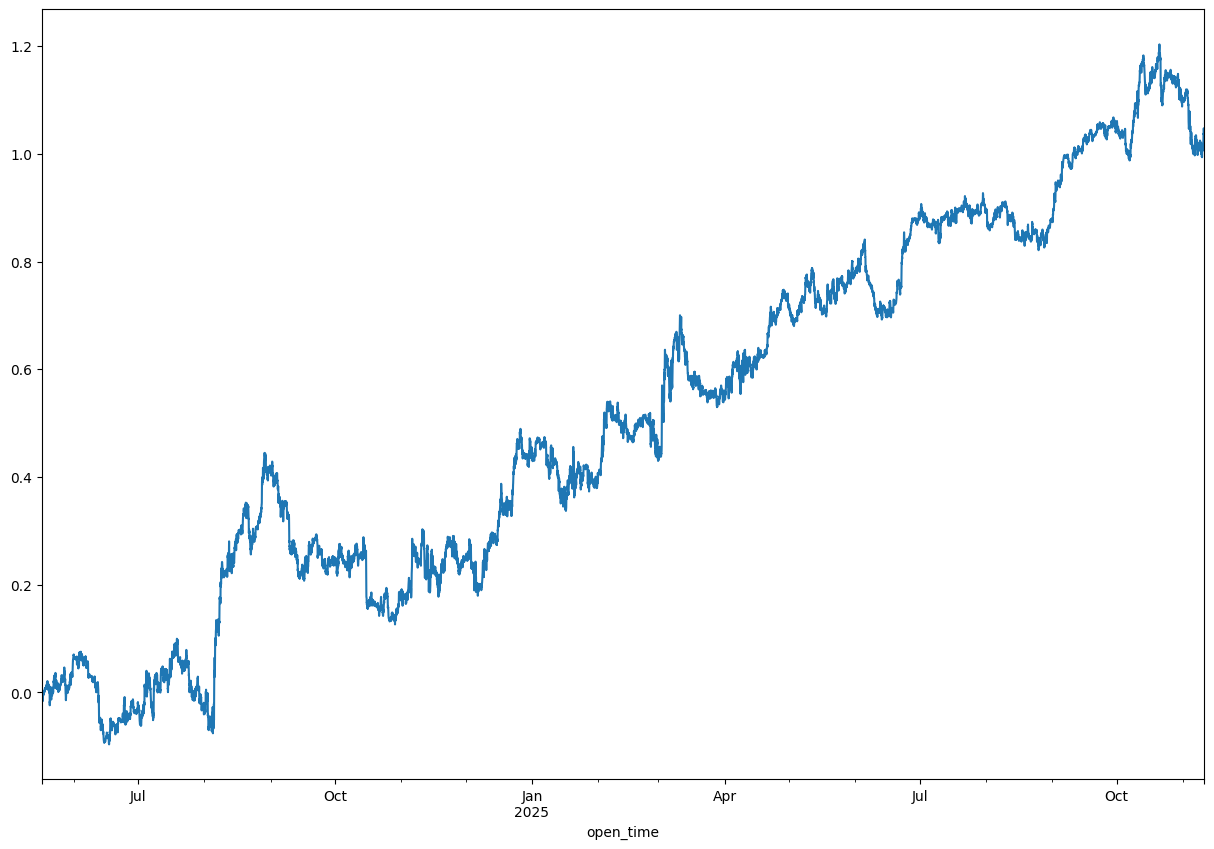

In [69]:
cum_trade_log_returns.plot(figsize=(15,10))

<Axes: xlabel='open_time'>

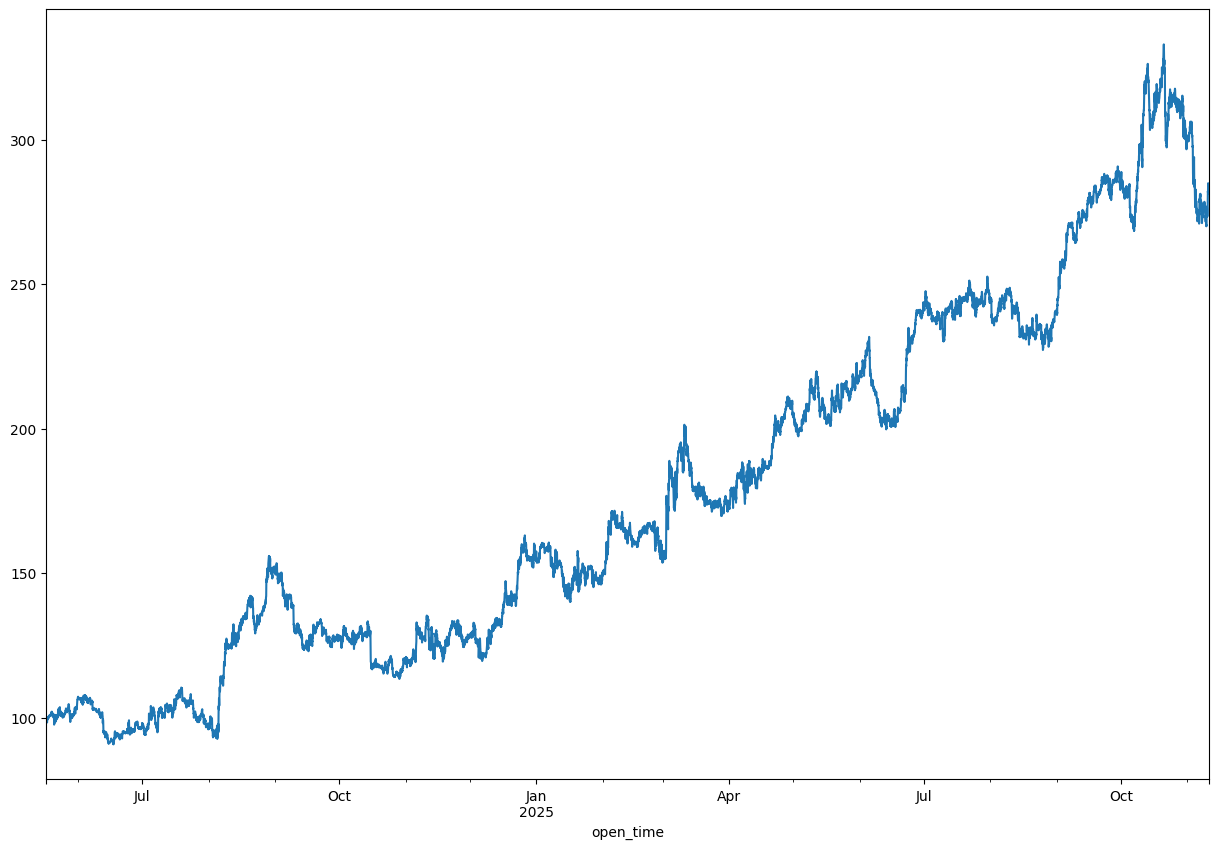

In [70]:
initial_capital = 100
gross_equity_curve = np.exp(cum_trade_log_returns) * 100
gross_equity_curve.plot(figsize=(15,10))

### Evaluate Sharpe Ratio

In [ ]:
#What returns do we do per return of risk

$$ \frac{Returns}{Risk} $$

In [71]:
btcusdt_test['trade_log_return'].mean() / btcusdt_test['trade_log_return'].std()

np.float64(0.01595308395686213)

### Annualization

In [ ]:
#We can measure it between arbitrary time periods
#t we trade perps 24*7
#hourly trading model
#take hourly Sharp ratio and multiply by annualization factor

In [72]:
no_trading_days_in_year = 365
no_hours_in_day = 24
t = no_trading_days_in_year * no_hours_in_day

btcusdt_test['trade_log_return'].mean() / btcusdt_test['trade_log_return'].std() * np.sqrt(t)

np.float64(1.4931268454340714)

### Evaluate Net Returns (inc. Trade Fees)

*   Taker => No Alpha => Fees will decay the edge => Win values reduced => Loss values amplified => Positive EV turns to Negative EV
*   Maker => Alpha => Fees very low and even negative (paid to add liquidity) => Positive EV stays positive

Next Videos: Classification => Cross Validation / Backtesting => Strategy

### Exercises

### Exercise 1: Dot Product

In [73]:
X = [
  [-0.1,-0.01],
  [0.2, 0.5]
]
w = [-0.5, -0.25]
y_hat = []


In [74]:
# write manual loop

In [75]:
# write loop to multiply matrix X by vector w and store result in y_hat

y_hat == [-0.1 * -0.5 + -0.01 * -0.25, 0.2 * -0.5 + 0.5 * -0.25]

False

### Exercise 2: Transpose

In [76]:
X = [
  [-0.1,-0.01,-0.2],
  [0.2, 0.5, 0.1]
]
X_transpose = []

In [77]:
# transpose X so you flip the shape from (2,3) to (3, 2)

In [78]:
X_transpose == [[-0.1, 0.2],[-0.01, 0.5],[-0.2, 0.1]]

False

### Exercise 3: Hadamard Product

In [79]:
y_true = [[0.01, -0.02], [-0.01, -0.03]]
y_hat = [[0.02, -0.03], [0.01, -0.01]]
error = []

In [80]:
### calc y_true - y_hat = error

In [81]:
error == [[0.01 - 0.02, -0.02 - (-0.03)],[-0.01 - 0.01, -0.03 - (-0.01)]]

False